# The Sparks Foundation

<h4>Task 4:-  Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’</h4>

**Problem statement:-  As a defense analyst, try to find out the hot zone of terrorism.**

### Author - SOURABH JHOD

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
df=pd.read_csv(r'C:\Users\m\Desktop\globalterrorismdb_0718dist.csv',encoding=('ISO-8859-1'))

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Checking for Null values

In [4]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# Data Cleaning

In [5]:
more_23=df.isnull().mean()*100

In [6]:
values=more_23[more_23>23].keys()
values=list(values)

In [7]:
cols=['latitude','longitude','natlty1','weapsubtype1','nkill','nwound','ishostkid']
a=values+cols

In [8]:
drop_columns=df.drop(columns=a)

In [9]:
drop_columns.shape


(181691, 40)

In [10]:
drop_columns.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               636
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1_txt    20768
property                0
dbsource                0
INT_LOG                 0
INT_IDEO                0
INT_MISC    

In [11]:
df_1=drop_columns.dropna()
df_1.shape

(149809, 40)

In [12]:
df_1.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
weapsubtype1_txt    0
property            0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

# Checking for duplicate values

In [13]:
df_1.duplicated().sum()

0

In [14]:
df_1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,individual,weaptype1,weaptype1_txt,weapsubtype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0,6,Explosives,Unknown Explosive Type,1,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,0,5,Firearms,Unknown Gun Type,1,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,0,5,Firearms,Automatic or Semi-Automatic Rifle,0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,0,6,Explosives,Unknown Explosive Type,1,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0,8,Incendiary,Molotov Cocktail/Petrol Bomb,1,Hewitt Project,0,0,0,0


# Exploratory Data Analysis

### Countries with most number of attacks

In [15]:
a=df_1['country_txt'].value_counts().head(20).sort_values(ascending=False).reset_index()

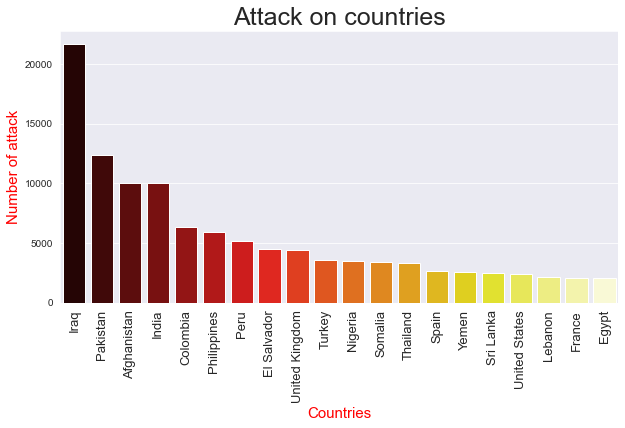

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=a['index'],y=a['country_txt'],palette='hot')
plt.xticks(rotation=90,fontsize=13)
plt.title('Attack on countries',fontsize=25)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **Iran is the country where the most attacks have happened so far.**
- **After Iran, Pakistan & Afghanistan are the countries where most attacks have happened.**
- **India is in 4th place in most attacked countries.**

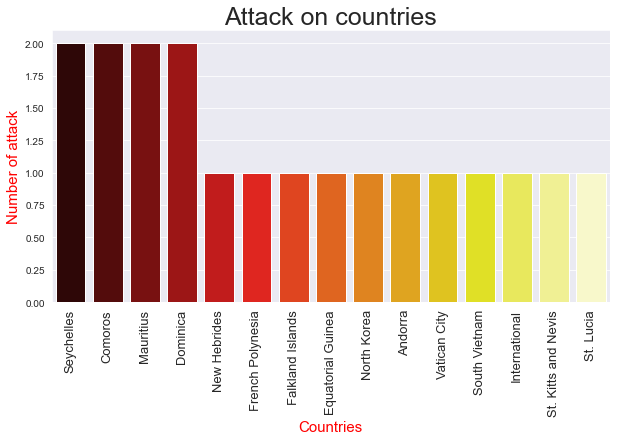

In [17]:
b=df_1['country_txt'].value_counts().tail(15).sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=b['index'],y=b['country_txt'],palette='hot')
plt.xticks(rotation=90,fontsize=13)
plt.title('Attack on countries',fontsize=25)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **St.Lucia is the counrty with the least number of attacks.**

# Region wise attacks

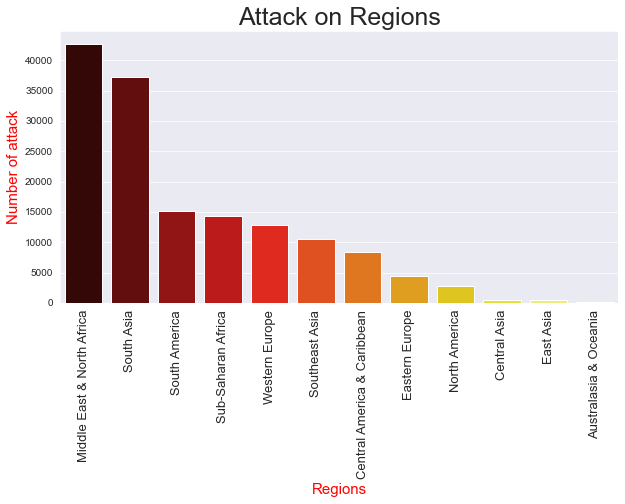

In [18]:
c=df_1['region_txt'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=c['index'],y=c['region_txt'],palette='hot')
plt.xticks(rotation=90,fontsize=13)
plt.title('Attack on Regions',fontsize=25)
plt.xlabel('Regions',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **Middle East & North Africa are the region where the most number of attacks have happened**
- **South Asia is in 2nd place in the list of most attacked region.**
- **Australasia & Oceania are the region whit least number of attacks.**

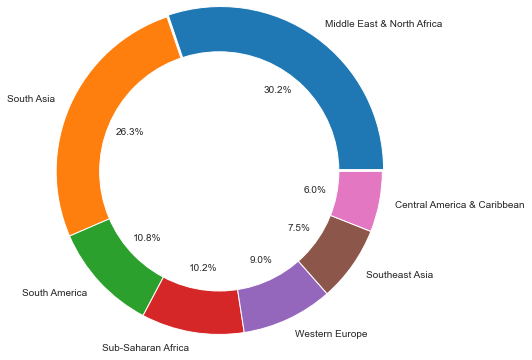

In [19]:
d=(df_1['region_txt'].value_counts().head(7)/df_1.shape[0]*100).reset_index()
plt.figure(figsize=(10,5))
labels=(d['index'])
explode=(0.02,0,0,0,0,0,0)
plt.pie(d['region_txt'],labels=labels,autopct='%.1f%%',radius=1.5,explode=explode)
my_circle=plt.Circle( (0,0), 1.1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- **We can notice that approx 30% of attacks have happend in Middle East & North Africa region**
- **Approx 26% of attacks have happened in South Asia region**

# Attack on states

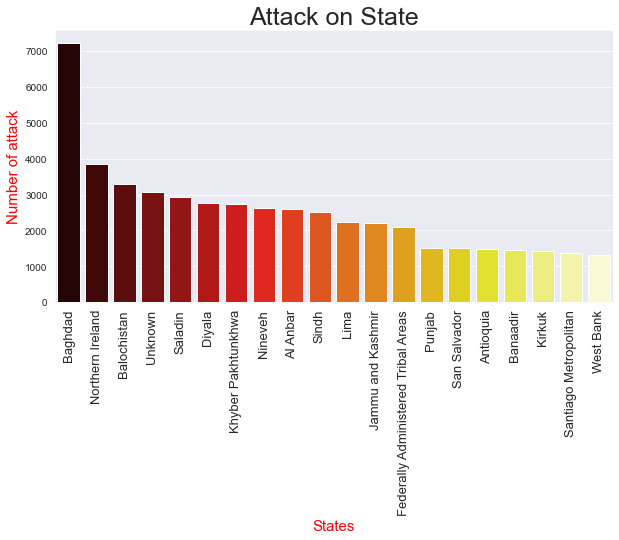

In [20]:
a=df_1['provstate'].value_counts().reset_index().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=a['index'],y=a['provstate'],palette='hot')
plt.xticks(rotation=90,fontsize=13)
plt.title('Attack on State',fontsize=25)
plt.xlabel('States',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **Baghdad is the state where most attacks have happened**

# Type Of Attack

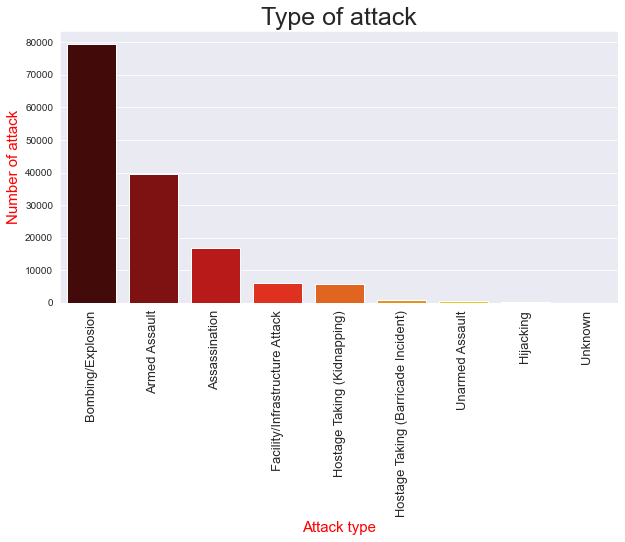

In [21]:
e=df_1['attacktype1_txt'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=e['index'],y=e['attacktype1_txt'],palette='hot')
plt.xticks(rotation=90,fontsize=13)
plt.title('Type of attack',fontsize=25)
plt.xlabel('Attack type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **Most of the attacks have happened with Bombing or Explosion**
- **After Bombing or Explosion, Armed assault kind of attack have happened most**
- **Here we can notice that Hijacjing & Unarmed  assault attack have happened in least number of times.**

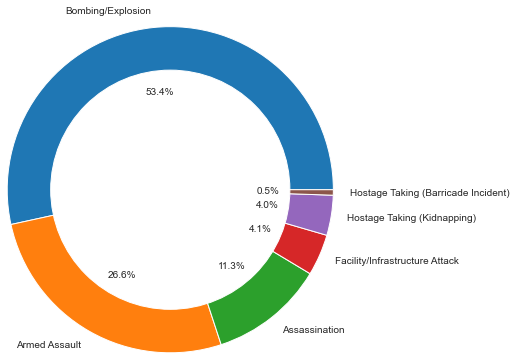

In [22]:
f=(df_1['attacktype1_txt'].value_counts()/df_1.shape[0]*100).reset_index().head(6)
plt.figure(figsize=(5,5))
labels=(f['index'])
plt.pie(f['attacktype1_txt'],labels=labels,autopct='%.1f%%',radius=1.5)
my_circle=plt.Circle( (0,0), 1.1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- **We can notice that approx 53% of the attacks have happened with Bombing or Explosion and 26% of the attacks have happened
with Armed assault.**


# Targeted area 

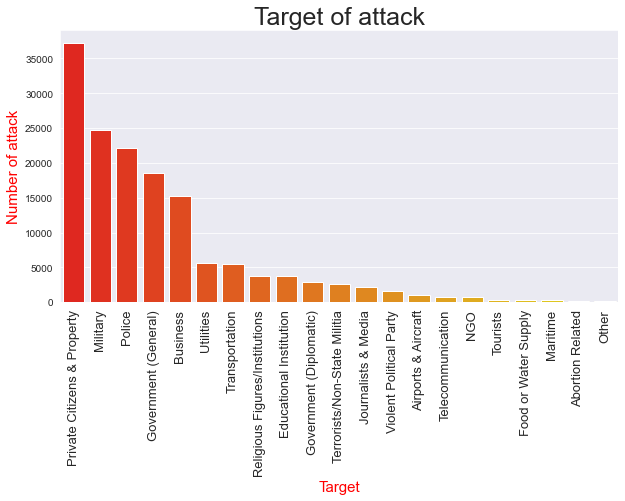

In [23]:
g=df_1['targtype1_txt'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=g['index'],y=g['targtype1_txt'],palette='autumn')
plt.xticks(rotation=90)
plt.title('Target of attack',fontsize=25)
plt.xlabel('Target',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **When attacks happens,they target Private Citizens & Property most number of time**
- **After that they target Military and Police forces**

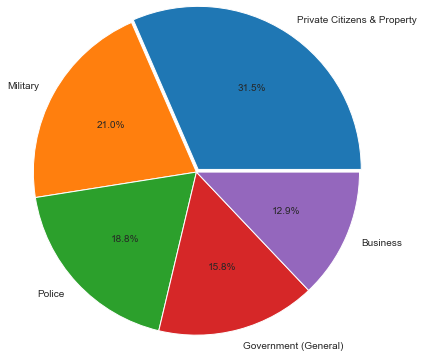

In [24]:
f=(df_1['targtype1_txt'].value_counts()/df_1.shape[0]*100).reset_index().head()
plt.figure(figsize=(5,5))
labels=(f['index'])
explode=(0.029,0,0,0,0)
plt.pie(f['targtype1_txt'],labels=labels,autopct='%.1f%%',radius=1.5,explode=explode)
plt.show()

- **In 31% of attacks that have happened,they target Private Citizens & Property**
- **After that they target 21% on Military and 19% on Police forces**

# Gang who involved in the attack

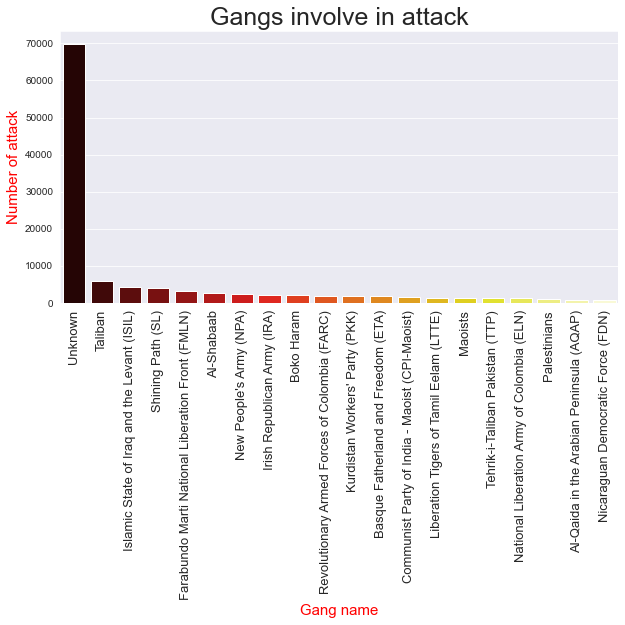

In [25]:
h=df_1['gname'].value_counts().reset_index().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=h['index'],y=h['gname'],palette='hot')
plt.xticks(rotation=90)
plt.title('Gangs involve in attack',fontsize=25)
plt.xlabel('Gang name',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

-  **We can notice from the above plot that when attacks happen, most of the time we don't even know who did the attack**

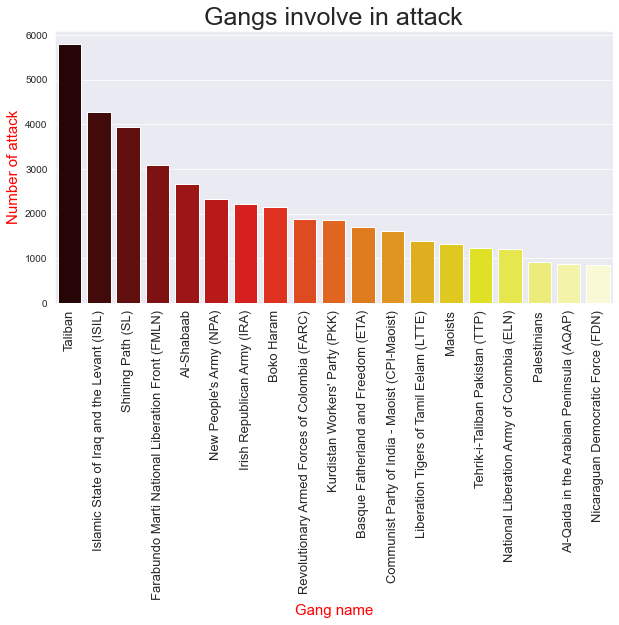

In [26]:
h=df_1['gname'].value_counts().reset_index().head(20)
h=h.drop(0)
plt.figure(figsize=(10,5))
sns.barplot(x=h['index'],y=h['gname'],palette='hot')
plt.xticks(rotation=90)
plt.title('Gangs involve in attack',fontsize=25)
plt.xlabel('Gang name',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **It is cleare from the above gaph that Taliban gang is involved in most of the attacks that have happened till now.**


<h3>TOP 5 Gang that involve in most attacks:</h3>

- **1. Taliban**
- **2. Islamic State of Iraq and the Levant (ISIL)**
- **3. Shining Path (SL)**
- **4. Farabundo Marti National Liberation Front (FMLN)**
- **5. Al-Shabaab**




# Weapon used in attacks

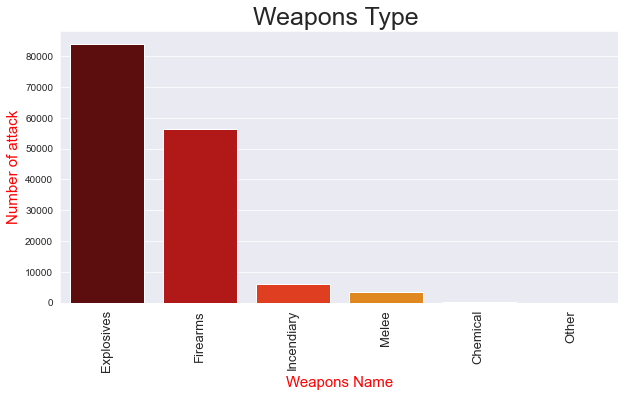

In [27]:
i=df_1['weaptype1_txt'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=i['index'],y=i['weaptype1_txt'],palette='hot')
plt.xticks(rotation=90)
plt.title('Weapons Type ',fontsize=25)
plt.xlabel('Weapons Name',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **Explosives are used by the gang to attack the target most of the times.**
- **After Explosives they Uses Firearms and Incendiary to attack target**

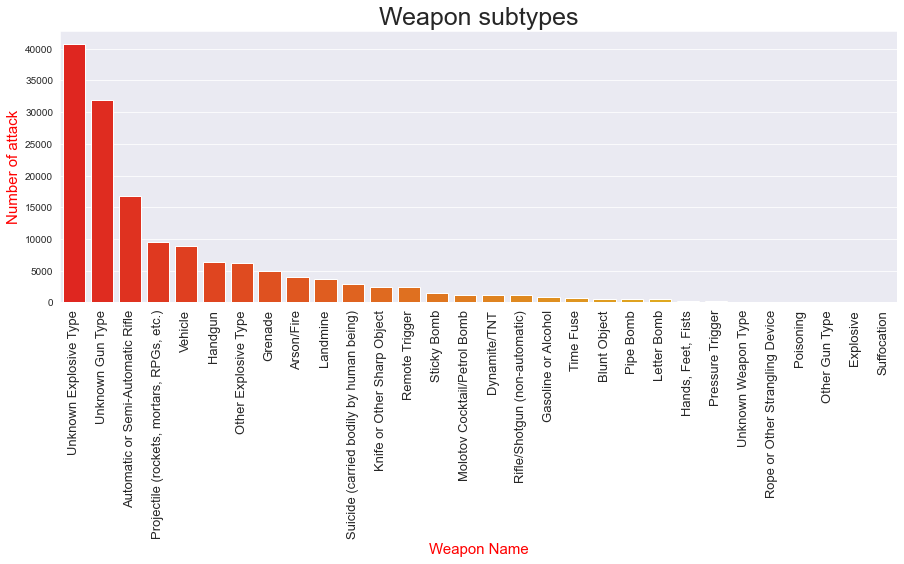

In [28]:
i=df_1['weapsubtype1_txt'].value_counts().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x=i['index'],y=i['weapsubtype1_txt'],palette='autumn')
plt.xticks(rotation=90)
plt.title('Weapon subtypes',fontsize=25)
plt.xlabel('Weapon Name',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

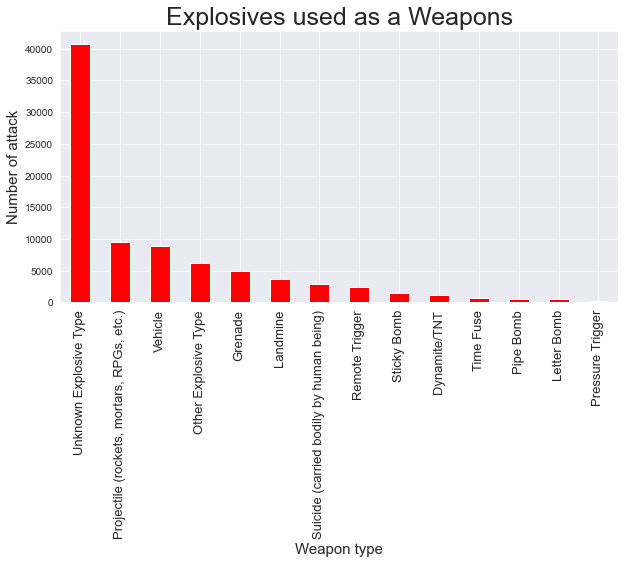

In [29]:
weaponstype=df_1.groupby('weaptype1_txt')
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Explosives']
plt.figure(figsize=(10,5))
a.plot.bar(color='r')
plt.title('Explosives used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15)
plt.ylabel('Number of attack',fontsize=15)
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Sub-types of Explosive used in attack most number of time</h3>

- **1. Unknown Explosion**
- **2. Rockets etc**
- **3. Vehicle**
- **4. Other Explosive Type**
- **5. Grenade**


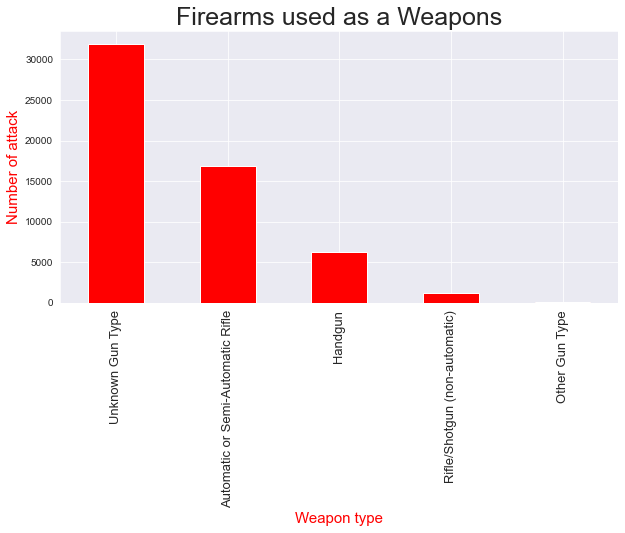

In [30]:
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Firearms']
plt.figure(figsize=(10,5))
a.plot.bar(color='r')
plt.title('Firearms used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Sub-types of Firearms used in attack most number of time</h3>

- **They use Automatic or semi-Atomatic Rifile and Unknown Gun type to attack target**

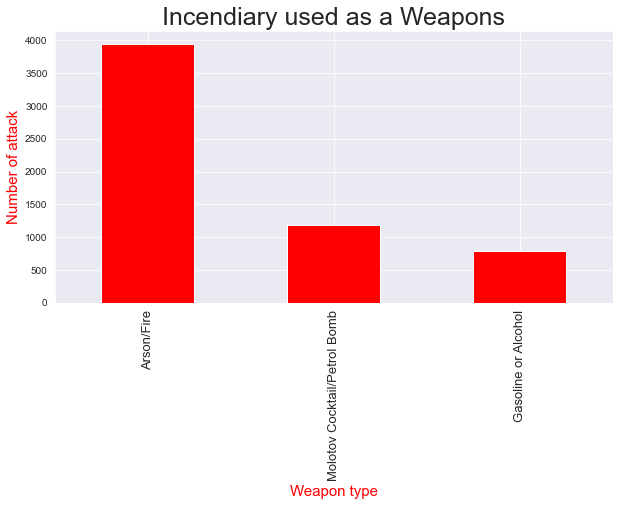

In [31]:
plt.figure(figsize=(10,5))
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Incendiary']
a.plot.bar(color='r')
plt.title('Incendiary used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Sub-types of Incendiary used in attack most number of time</h3>

- **They use Arson / fire or Cocktain to attack target**


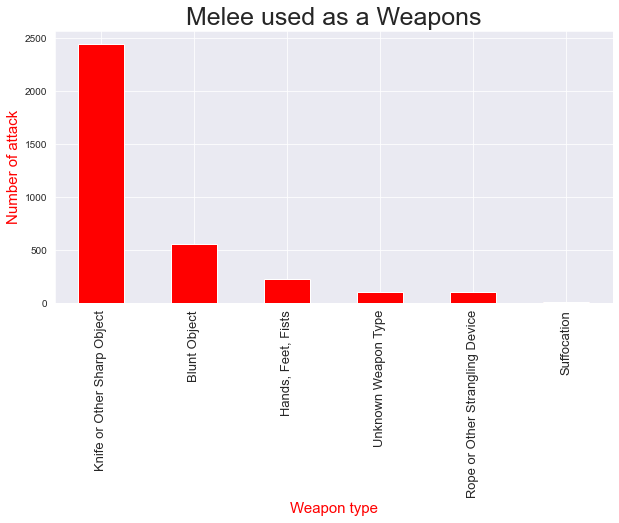

In [32]:
plt.figure(figsize=(10,5))
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Melee']
a.plot.bar(color='r')
plt.title('Melee used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Sub-types of Melee used in attack most number of time</h3>

- **They use sharp object to attack**


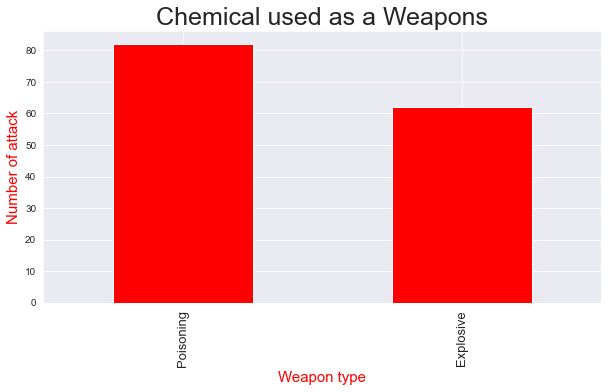

In [33]:
plt.figure(figsize=(10,5))
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Chemical']
a.plot.bar(color='r')
plt.title('Chemical used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

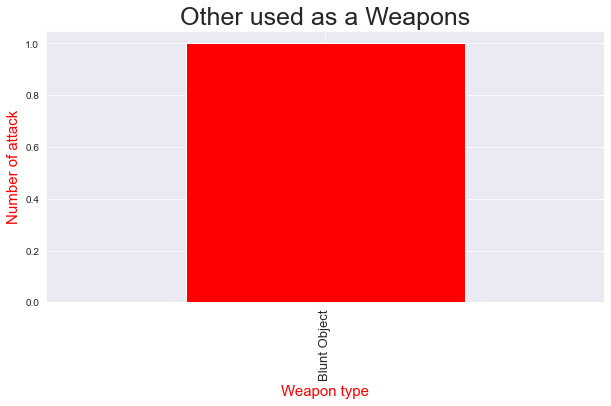

In [34]:
plt.figure(figsize=(10,5))
a=weaponstype['weapsubtype1_txt'].value_counts().loc['Other']
a.plot.bar(color='r')
plt.title('Other used as a Weapons',fontsize=25)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

# Weapons used by Gangs to attack most number of time 

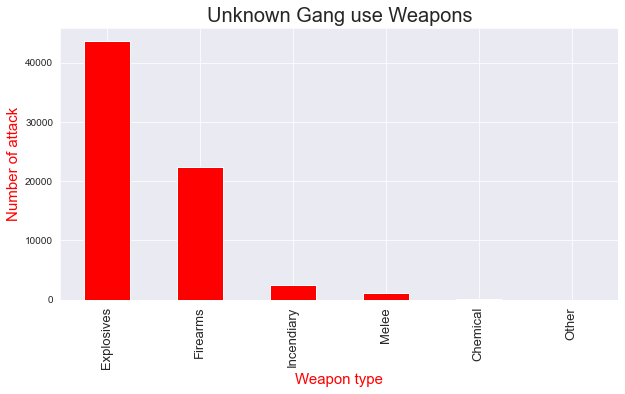

In [35]:
gangster=df_1.groupby('gname')
plt.figure(figsize=(10,5))
a=gangster['weaptype1_txt'].value_counts().loc['Unknown']
a.plot.bar(color='r')
plt.title('Unknown Gang use Weapons',fontsize=20)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **The gang that dosen't get caught mostly uses Explosive to attack.**

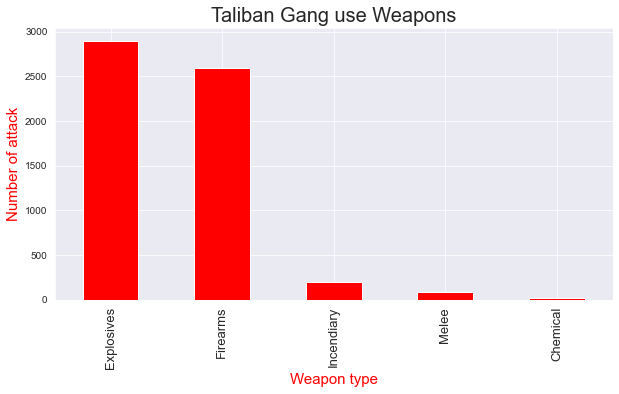

In [36]:
plt.figure(figsize=(10,5))
a=gangster['weaptype1_txt'].value_counts().loc['Taliban']
a.plot.bar(color='r')
plt.title('Taliban Gang use Weapons',fontsize=20)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **Taliban gang mostly uses Explosive and Firearms to attack.**

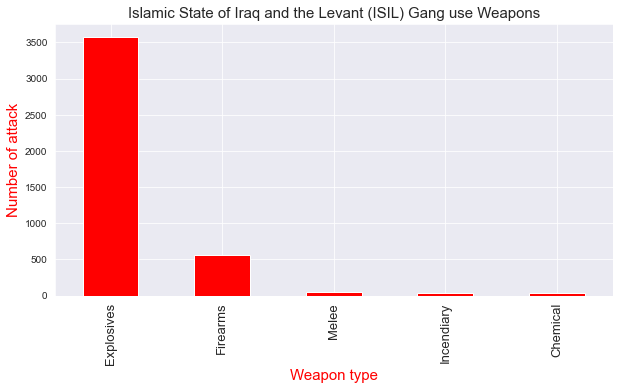

In [37]:
plt.figure(figsize=(10,5))
a=gangster['weaptype1_txt'].value_counts().loc['Islamic State of Iraq and the Levant (ISIL)']
a.plot.bar(color='r')
plt.title('Islamic State of Iraq and the Levant (ISIL) Gang use Weapons',fontsize=15)
plt.xlabel('Weapon type',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

- **Islamic State of Iraq and the Levant (ISIL) gang mostly uses Explosive and Firearms to attack.**

# Country wise attack on city

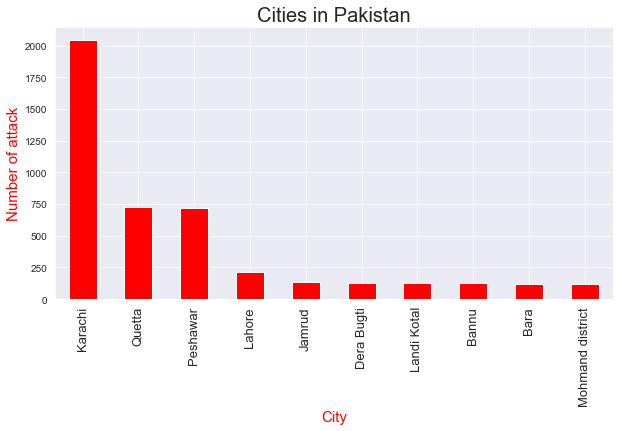

In [38]:
country=df_1.groupby('country_txt')
plt.figure(figsize=(10,5))
a=country['city'].value_counts().loc['Pakistan'].head(10)
a.plot.bar(color='r')
plt.title('Cities in Pakistan',fontsize=20)
plt.xlabel('City',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Top 5 Hot zone or terrorism in Pakistan</h3>

- **1. Karachi**
- **2. Quetta**
- **3. Peshawar**
- **4. Lahore**
- **5. Jamrud**


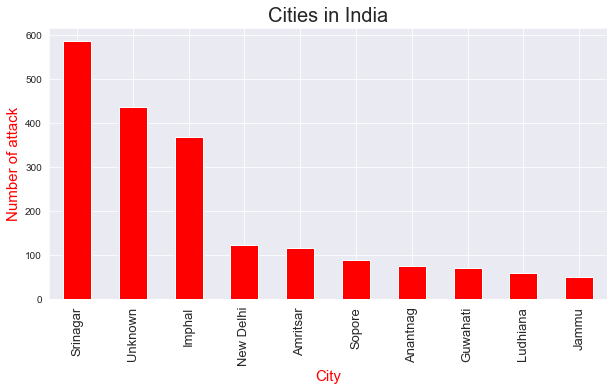

In [39]:
plt.figure(figsize=(10,5))
a=country['city'].value_counts().loc['India'].head(10)
a.plot.bar(color='r')
plt.title('Cities in India',fontsize=20)
plt.xlabel('City',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Top 5 Hot zone or terrorism in India</h3>

- **1. Shrinagar**
- **2. Imphal**
- **3. New Delhi**
- **4. Amritsar**
- **5. Sopore**


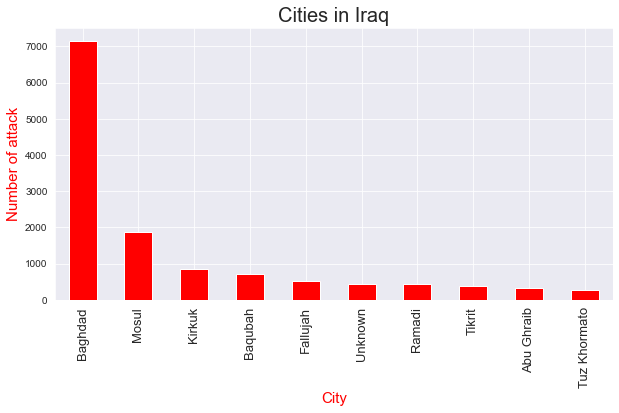

In [40]:
plt.figure(figsize=(10,5))
a=country['city'].value_counts().loc['Iraq'].head(10)
a.plot.bar(color='r')
plt.title('Cities in Iraq',fontsize=20)
plt.xlabel('City',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Top 5 Hot zone or terrorism in Iraq</h3>

- **1. Baghdad**
- **2. Mosul**
- **3. Kirkuk**
- **4. Baqubah**
- **5. Fallujah**


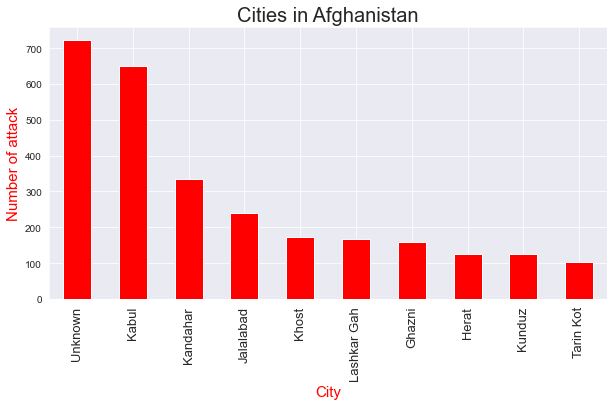

In [41]:
plt.figure(figsize=(10,5))
a=country['city'].value_counts().loc['Afghanistan'].head(10)
a.plot.bar(color='r')
plt.title('Cities in Afghanistan',fontsize=20)
plt.xlabel('City',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Top 5 Hot zone or terrorism in Afghanistan</h3>

- **1. Kabul**
- **2. Kandahar**
- **3. Jalalabad**
- **4. Lahore**
- **5. Jamrud**


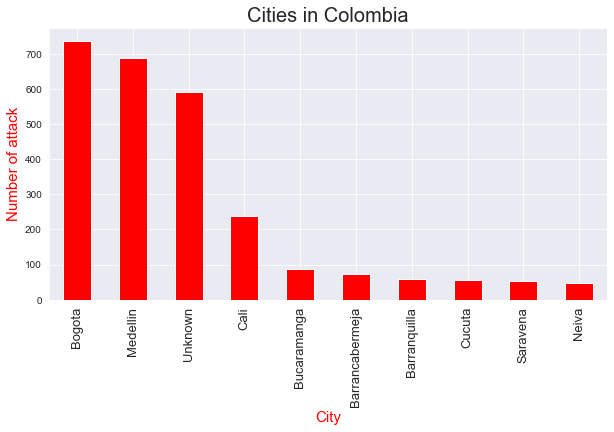

In [42]:
plt.figure(figsize=(10,5))
a=country['city'].value_counts().loc['Colombia'].head(10)
a.plot.bar(color='r')
plt.title('Cities in Colombia',fontsize=20)
plt.xlabel('City',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=13)
plt.show()

<h3>Top 5 Hot zone or terrorism in Afghanistan</h3>

- **1. Bogota**
- **2. Medellin**
- **3. Cali**
- **4. Bucaramanga**
- **5. Barrancabermeja**

# Maximum attack in year

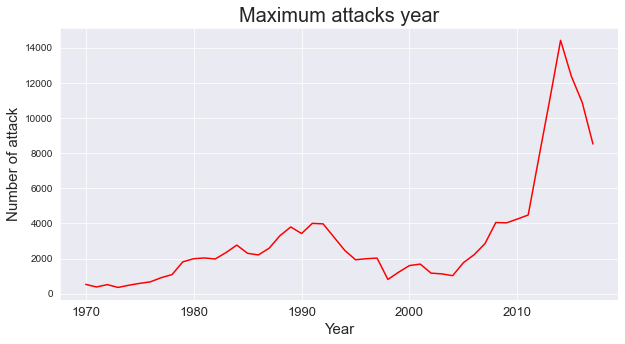

In [43]:
h=df_1['iyear'].value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=h['index'],y=h['iyear'],color='r')
plt.xticks(rotation=0,fontsize=13)
plt.title('Maximum attacks year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of attack',fontsize=15)
plt.show()


- **We can notice from above graph that number of attacks increased with the year**

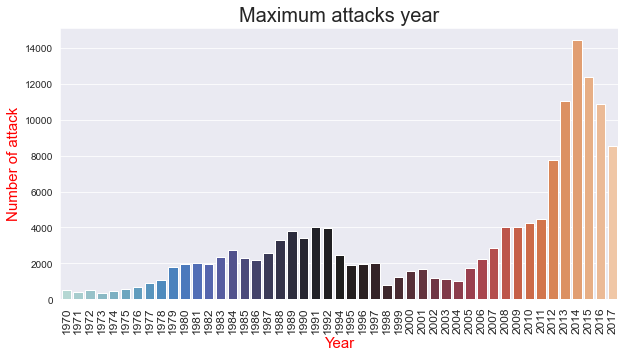

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=h['index'],y=h['iyear'],palette='icefire') 
plt.xticks(rotation=90,fontsize=12)
plt.title('Maximum attacks year',fontsize=20)
plt.xlabel('Year',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **We can observe from the above graph that 2014 is the year where most of the attacks have happened all over the Globe with more that 14000+ attack**

# Month of attack

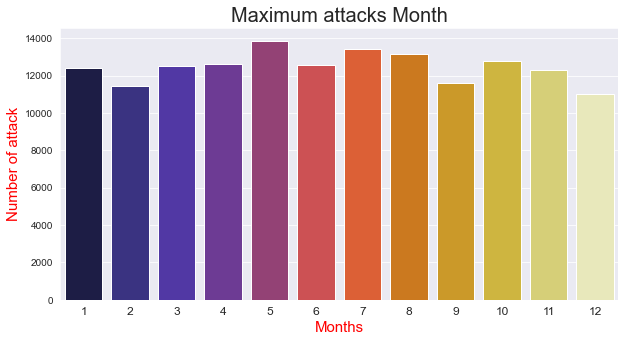

In [45]:
plt.figure(figsize=(10,5))
g=df_1['imonth'].value_counts().sort_index().reset_index()
g=g.drop(0)
sns.barplot(g['index'],g['imonth'],palette='CMRmap')
plt.title('Maximum attacks Month',fontsize=20)
plt.xlabel('Months',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(fontsize=12)
plt.show()

# Maximum attack on countries in year 

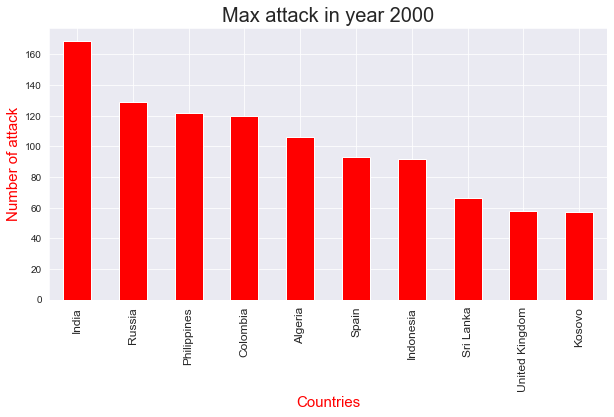

In [46]:
plt.figure(figsize=(10,5))
year=df_1.groupby('iyear')
a=year['country_txt'].value_counts().loc[2000].head(10)
a.plot.bar(color='r')
plt.xticks(rotation=90,fontsize=12)
plt.title('Max attack in year 2000',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **In year 2000, India is the country where most number of attacks have happened**

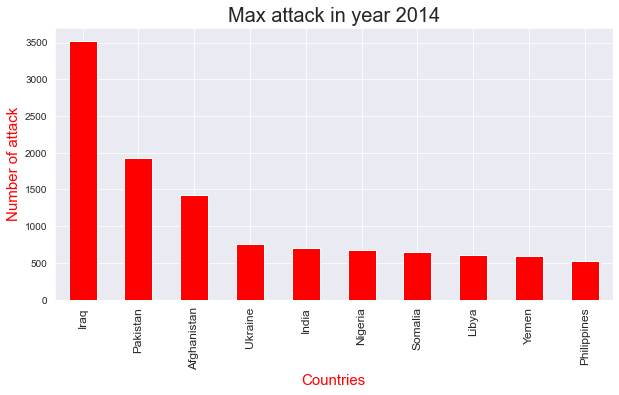

In [47]:
plt.figure(figsize=(10,5))
year=df_1.groupby('iyear')
a=year['country_txt'].value_counts().loc[2014].head(10)
a.plot.bar(color='r')
plt.title('Max attack in year 2014',fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **In year 2014, Iraq is the country where most number of attacks have happened**

# Region

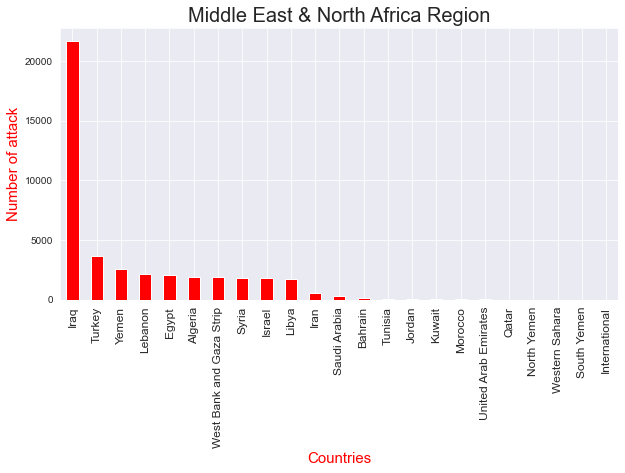

In [48]:
Region=df_1.groupby('region_txt')
a=Region['country_txt'].value_counts().loc['Middle East & North Africa']
plt.figure(figsize=(10,5))
a.plot.bar(color='r')
plt.title('Middle East & North Africa Region',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **In Middle East & North Africa Region, Iraq,Turkey,Yemen are the countries with maximum number of attacks**

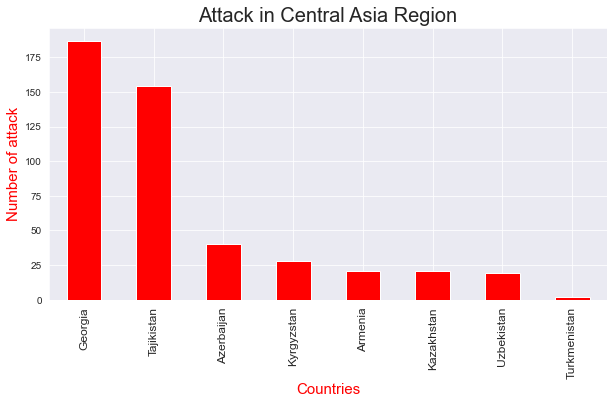

In [49]:
plt.figure(figsize=(10,5))
a=Region['country_txt'].value_counts().loc['Central Asia']
a.plot.bar(color='r')
plt.title('Attack in Central Asia Region',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=12)
plt.show()

- **In Central Asia Region, Georgia,Tajkiastan & Azerbaijan are the countries with maximum number of attacks**

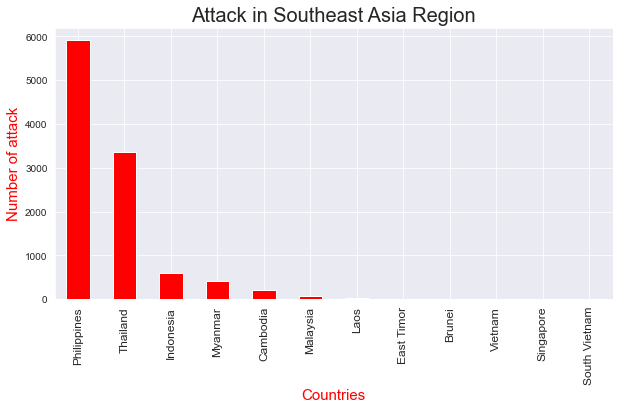

In [50]:
plt.figure(figsize=(10,5))
a=Region['country_txt'].value_counts().loc['Southeast Asia']
a.plot.bar(color='r')
plt.title('Attack in Southeast Asia Region',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=12)
plt.show()

- **In Southeast Asia Region, Philippines, Thailand , Indonesia are the countries with maximum number of attacks**

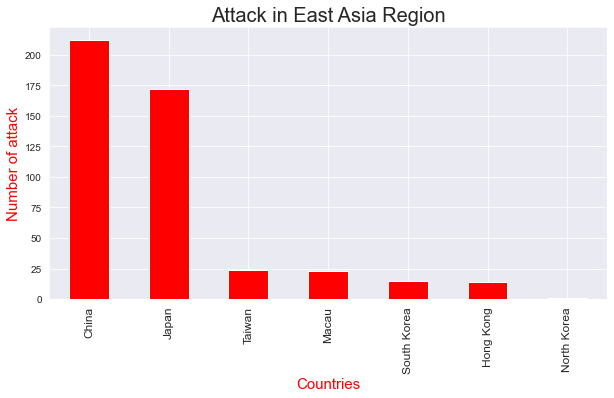

In [51]:
plt.figure(figsize=(10,5))
a=Region['country_txt'].value_counts().loc['East Asia']
a.plot.bar(color='r')
plt.title('Attack in East Asia Region',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.show()

- **In East Asia Region, China & Japan are the countries with maximum number of attacks**

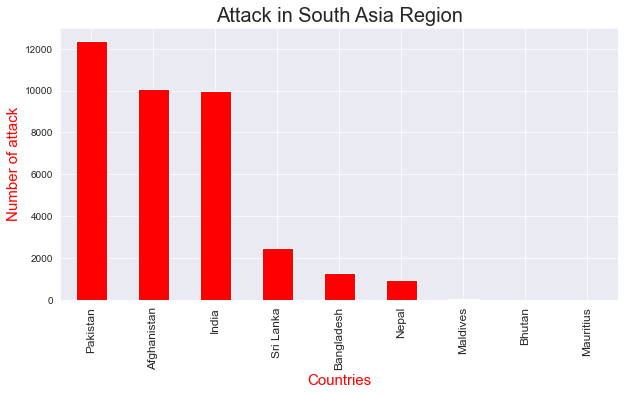

In [52]:
plt.figure(figsize=(10,5))
a=Region['country_txt'].value_counts().loc['South Asia']
a.plot.bar(color='r')
plt.title('Attack in South Asia Region',fontsize=20)
plt.xlabel('Countries',fontsize=15,color='r')
plt.ylabel('Number of attack',fontsize=15,color='r')
plt.xticks(rotation=90,fontsize=12)
plt.show()

- **In South Asia Region, Pakistan , Afghanistan , India are the countries with maximum number of attacks**